📊 PCA Explained Variance Ratio: [0.72962445 0.22850762]
🔹 PCA1 explains 72.96% of variance
🔹 PCA2 explains 22.85% of variance

📊 LDA Explained Variance Ratio: [0.9912126 0.0087874]
🔹 LDA1 explains 99.12% of variance
🔹 LDA2 explains 0.88% of variance


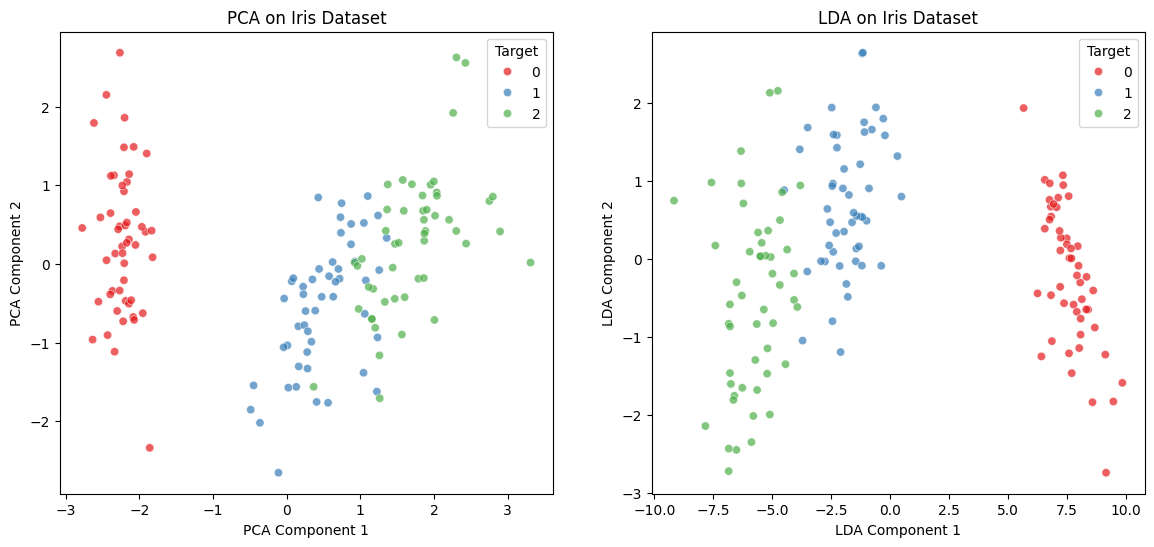


🔻 Model Accuracy Comparison 🔻
🎯 Accuracy with PCA (2D): 0.8667
🎯 Accuracy with LDA (2D): 0.9778
🚀 LDA performs better for classification tasks!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Splitting features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardizing the features (PCA & LDA are sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# -------------------------------
# 📌 PCA: Reduce 4D to 2D
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (PCA)
pca_variance = pca.explained_variance_ratio_
print(f"📊 PCA Explained Variance Ratio: {pca_variance}")
print(f"🔹 PCA1 explains {pca_variance[0] * 100:.2f}% of variance")
print(f"🔹 PCA2 explains {pca_variance[1] * 100:.2f}% of variance")

# Train model using PCA-transformed features
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# -------------------------------
# 📌 LDA: Reduce 4D to 2D
# -------------------------------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Explained variance ratio (LDA)
lda_variance = lda.explained_variance_ratio_
print(f"\n📊 LDA Explained Variance Ratio: {lda_variance}")
print(f"🔹 LDA1 explains {lda_variance[0] * 100:.2f}% of variance")
print(f"🔹 LDA2 explains {lda_variance[1] * 100:.2f}% of variance")

# Train model using LDA-transformed features
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, y, test_size=0.3, random_state=42, stratify=y)
clf_lda = RandomForestClassifier(random_state=42)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# -------------------------------
# 📌 Visualizing PCA vs LDA
# -------------------------------
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Target'] = y

lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
lda_df['Target'] = y

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA Plot
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue=pca_df['Target'], palette='Set1', alpha=0.7, ax=axes[0])
axes[0].set_title('PCA on Iris Dataset')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# LDA Plot
sns.scatterplot(data=lda_df, x='LDA1', y='LDA2', hue=lda_df['Target'], palette='Set1', alpha=0.7, ax=axes[1])
axes[1].set_title('LDA on Iris Dataset')
axes[1].set_xlabel('LDA Component 1')
axes[1].set_ylabel('LDA Component 2')

plt.show()

# -------------------------------
# 📌 Comparing Accuracy of PCA vs LDA
# -------------------------------
print("\n🔻 Model Accuracy Comparison 🔻")
print(f"🎯 Accuracy with PCA (2D): {accuracy_pca:.4f}")
print(f"🎯 Accuracy with LDA (2D): {accuracy_lda:.4f}")

if accuracy_lda >= accuracy_pca:
    print("🚀 LDA performs better for classification tasks!")
else:
    print("⚠️ PCA might not be ideal for classification, as it ignores class labels.")
